## Image Classifcation CNN AND MLP

### Loading the Data

#### 1.0 Load dependencies and get data

In [1]:
import tensorflow as tf
import os
import cv2


In [36]:
data_dir = ('C:/Users/gabri/git/Image_Classification/Data')

#### 1.1 Remove any images that are not of the following type: 'jpeg','jpg', 'bmp', 'png'

#### 1.2 Load Data

In [3]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 11525 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()
# get another batch from the iterator
batch = data_iterator.next()

In [5]:
# images representet as numpy arrays
batch[0].shape

(32, 256, 256, 3)

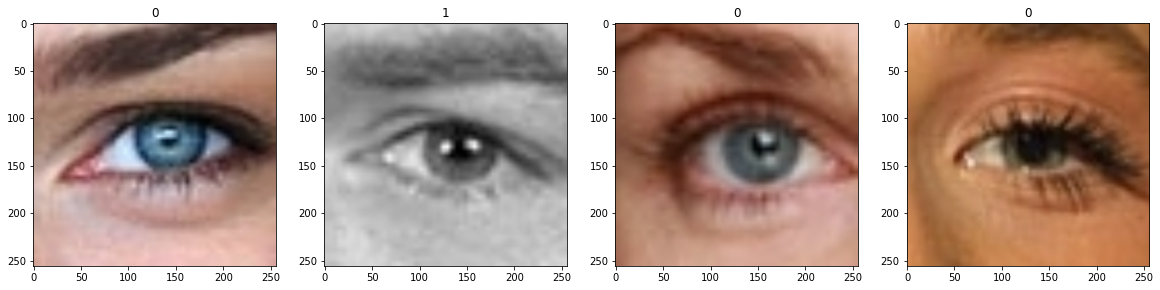

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preparing the Data for CNN

#### 2.0 Data preprocessing

In [7]:
#images exists in batch[0] and labels in batch[1]

#when dealing with any deep learning model you want the values to be as small as possible and it will alllow you to optimize the model
#this is why we divide by 255
#allow you to transform the data in the pipline
#so when we load in a batch we divided the image = x by 255
data = data.map(lambda x, y: (x/255, y))

In [8]:
scaled_iterator = data.as_numpy_iterator()

In [9]:
# rather the creating seperate_ values from the iterator we can acess the data directly
#as numpy iterator gives us acsess to the iterator 
#next gives us the next batch
batch = scaled_iterator.next()

In [10]:
batch[0].min(), batch[0].max()
# we have now scaled the data as the images are between 0 and 1

(0.0, 1.0)

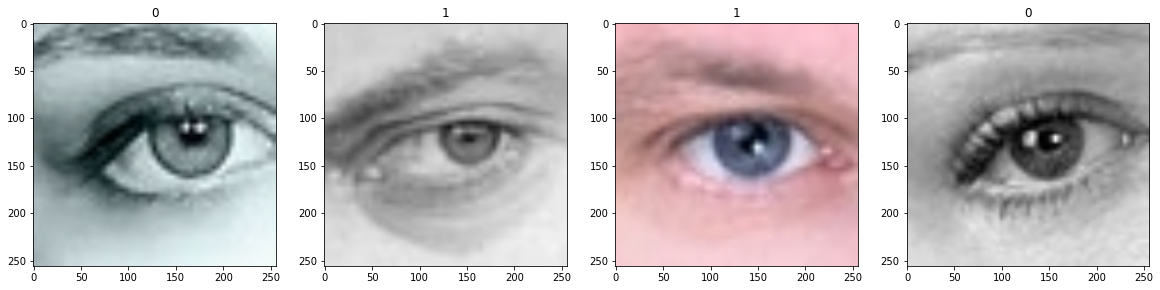

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) #  before astype(int) cannot have astype int since the values are now between 0 and 1 when we divided by 255 therefore images will be black 
    ax[idx].title.set_text(batch[1][idx])

#### 2.1 Split Data test and train

In [13]:
#split the data into training and testing partition, so that we can test to see if the model has overfit the data or not

len(data)
#so we have 361 batches of 32 images each
#we want to split the data into 80% training and 20% testing
# 361*0.7 = 252.7 train can be betwen 70-90% of the data used to train the model
# 361*0.2 = 72.2 validation can be betwen 10-30% of the data used to evaullted the model when we train it to fine tune it, good practice to have a validation set
# 361*0.1 = 36.1 test can be betwen 10-30% of the data used will not be used until the evalution used in post training to see how well the model performs

361

In [14]:
# we create test validation and training data
train_size = int(len(data)*0.7)
validation_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

test_size + validation_size + train_size
#rounds down therefore we have 360 batches of 32 images each instead of 361

(36, 72, 252)

In [16]:
train_data = data.take(train_size)  # take the first 252 batches
validation_data = data.skip(train_size).take(validation_size) # skip the first 252 batches and take the next 72 batches
test_data = data.skip(train_size+validation_size).take(test_size) # skip the first 252+72 batches and take the next 36 batches

len(train_data), len(validation_data), len(test_data)

### Deep Learning

#### 3.0 Build the model for Deep Learning

In [18]:
# import dependencies
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

#list of each depenedency
#Sequential: allows us to create a model layer by layer, great if data flows in a linear way
#Dense: allows us to create a fully connected layer, great for classification
#Flatten: allows us to flatten the data, great for when we want to go from a convolutional layer to a fully connected layer
#Conv2D: allows us to create a 2d convolutional layer, great for image classification
#MaxPooling2D: allows us to create a pooling layer, great for image classification, goes through the image and finds the max value in a certain area 
#Dropout: allows us to create a dropout layer, great for regularization


In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #add maximun value from the 2x2 region

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # when you apply a convolutional layer you get a 3d tensor, when you apply a fully connected layer you need a 1d tensor, therefore we need to flatten the data

model.add(Dense(256, activation='relu')) #dense layers are fully connected layers 256 neurons in the layer 
model.add(Dense(2, activation='softmax')) # a single dense layer with a sigmoid activation function, this output is either 0 or 1 


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #binary cross entropy is used for binary classification, adam is a gradient descent algorithm
model.summary()

#### 3.1 Train the Model for CNN

In [23]:
train_history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
252/252 [==============================] - 277s 1s/step - loss: 0.5141 - accuracy: 0.7436 - val_loss: 0.4015 - val_accuracy: 0.8129
Epoch 2/10
252/252 [==============================] - 313s 1s/step - loss: 0.3796 - accuracy: 0.8332 - val_loss: 0.3488 - val_accuracy: 0.8459
Epoch 3/10
252/252 [==============================] - 295s 1s/step - loss: 0.3465 - accuracy: 0.8507 - val_loss: 0.3580 - val_accuracy: 0.8424
Epoch 4/10
252/252 [==============================] - 311s 1s/step - loss: 0.3160 - accuracy: 0.8638 - val_loss: 0.3189 - val_accuracy: 0.8611
Epoch 5/10
252/252 [==============================] - 295s 1s/step - loss: 0.2867 - accuracy: 0.8776 - val_loss: 0.2787 - val_accuracy: 0.8850
Epoch 6/10
252/252 [==============================] - 305s 1s/step - loss: 0.2689 - accuracy: 0.8895 - val_loss: 0.2598 - val_accuracy: 0.8924
Epoch 7/10
252/252 [==============================] - 293s 1s/step - loss: 0.2436 - accuracy: 0.9017 - val_loss: 0.2822 - val_accuracy: 0.8863

In [24]:
#we can see that the model is overfitting the data, the training accuracy is increasing but the validation accuracy is decreasing
#we can see that the model is overfitting the data, the training loss is decreasing but the validation loss is increasing

# train history took 49min for 10 epochs going through 252 batches of 32 images each


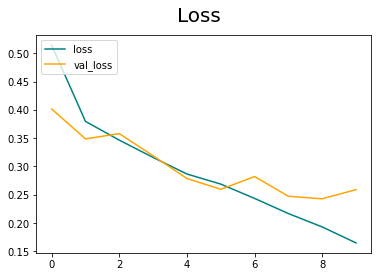

In [25]:
fig = plt.figure()
plt.plot(train_history.history['loss'], color='teal', label='loss')
plt.plot(train_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

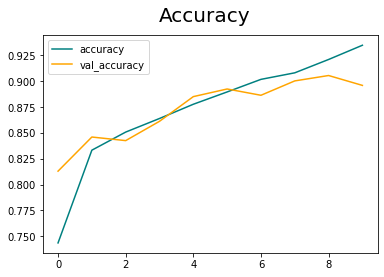

In [26]:
fig = plt.figure()
plt.plot(train_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(train_history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### 4.0 Evaluation

In [27]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
#
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()


In [29]:
for batch in test_data.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 429ms/step


In [30]:
print(f"Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}")

Precision: 0.8835821151733398, Recall: 0.9487179517745972, Accuracy: 0.9045138955116272


### MLP

In [37]:
mlp_data = ('C:/Users/gabri/git/Image_Classification/Data')